In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

In [5]:
# загружаем данные

partners = pd.read_csv('raw_data/test_data_151123/ВыгрузкаПартнеры_UTF-8(14.11.23).csv', sep=';')
buh = pd.read_csv('raw_data/test_data_151123/ВыгрузкаБух_UTF-8(14.11.23).csv', sep=';')
crm = pd.read_csv('raw_data/test_data_151123/ВыгрузкаСРМ_UTF-8(14.11.23).csv', sep=';')
comments = pd.read_json('raw_data/test_data_151123/ВыгрузкаJSON.json')

In [37]:
# смотрим сколько пропущенных значений (в проценатах)
partners.isnull().mean().sort_values(ascending=False) * 100

parrent           96.704013
client_bin/tin    46.104742
value              7.295466
type               6.657113
del_mark           0.143304
index              0.091193
client             0.039083
dtype: float64

In [38]:
buh.isnull().mean().sort_values(ascending=False) * 100

main_cp           98.4
it_name            0.2
index              0.0
id_realisation     0.0
date_issued        0.0
author             0.0
company_name       0.0
company_bin        0.0
item               0.0
price              0.0
quant              0.0
summ_corr          0.0
seller             0.0
dtype: float64

In [39]:
crm.isnull().mean().sort_values(ascending=False) * 100

like              93.9
parrent_id        74.4
cp_position       62.0
equipment_id      39.8
norm              14.2
cat               12.9
cp_sex             3.2
client_tin/bin     1.2
project            0.7
cp_condition       0.3
contact_person     0.1
marks              0.0
client             0.0
hours              0.0
index              0.0
department         0.0
it_name            0.0
id_ticket          0.0
author             0.0
create             0.0
end                0.0
start              0.0
del_mark           0.0
dtype: float64

In [57]:
comments['text_log'][12]

'Описание: 211: 132 все сделал\n\n\n\nПереадресовано от IT162 Кулебякин Александр 03.01.2023 10:36:09 (предыдущее состояние "Запланировано")\nОписание от клиента:\nне работает СРМ \n\nSrvr="192.168.10.2";Ref="CRM";\n02.01.2023 20:37:11\nНевосстановимая ошибка\nОшибка при выполнении запроса POST к ресурсу /e1cib/modules/call:\nпо причине:\nОшибка СУБД:\nMicrosoft SQL Server Native Client 11.0: Журнал транзакций для базы данных "CRM" переполнен. Причина: "LOG_BACKUP".\nHRESULT=80040E14, SQLSrvr: SQLSTATE=42000, state=2, Severity=11, native=9002, line=1\nПароль от тимвивера:\n\nРезультат: связался с клиентом - не актуально'

In [62]:
crm['end'] = pd.to_datetime(crm['end'], dayfirst=True)

<Axes: xlabel='norm', ylabel='Count'>

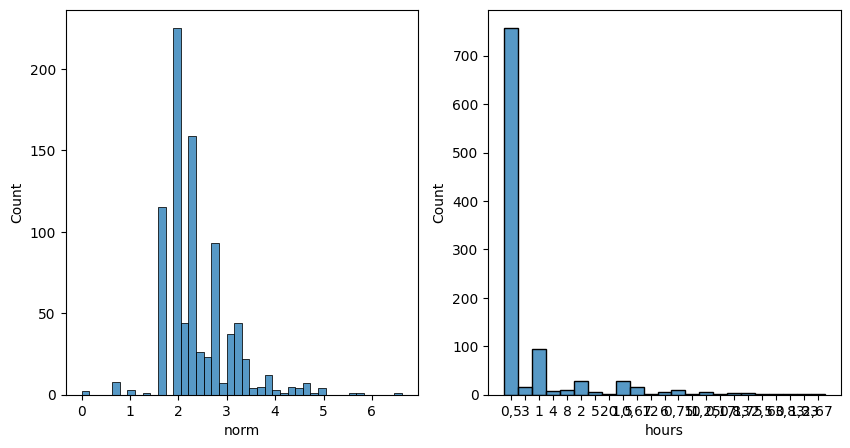

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(
    x='hours',
    data=crm,
    ax=ax[1]
)

loga = np.log(crm['norm'])

sns.histplot(
    x=loga,
    data=crm,
    ax=ax[0]
)

In [89]:
partners.head(20)

index                                             client parrent  \
0     1.0                                A01 Ayrosa (Айроса)     NaN   
1     2.0                                A01 Ayrosa (Айроса)     NaN   
2     3.0                                A01 Ayrosa (Айроса)     NaN   
3     4.0                                A01 Ayrosa (Айроса)     NaN   
4     5.0                                A01 Ayrosa (Айроса)     NaN   
5     6.0                                 A02 AVITIM(АВИТИМ)     NaN   
6     7.0                                 A02 AVITIM(АВИТИМ)     NaN   
7     8.0                                 A02 AVITIM(АВИТИМ)     NaN   
8     9.0                                 A02 AVITIM(АВИТИМ)     NaN   
9    10.0                                 A02 AVITIM(АВИТИМ)     NaN   
10   11.0   A02 INVISION group (инвижион сайтоделы, наши ...     NaN   
11   12.0   A02 INVISION group (инвижион сайтоделы, наши ...     NaN   
12   13.0   A02 INVISION group (инвижион сайтоделы, наши ...     NaN   
13   14.0   A02 INVISION group (инвижион сайтоделы, наши ...     NaN   
14   15.0   A02 INVISION group (инвижион сайтоделы, наши ...     NaN   
15   16.0       A02 Рояль кусто (royal kusto, наши партнеры)     NaN   
16   17.0       A02 Рояль кусто (royal kusto, наши партнеры)     NaN   
17   18.0       A02 Рояль кусто (royal kusto, наши партнеры)     NaN   
18   19.0       A02 Рояль кусто (royal kusto, наши партнеры)     NaN   
19   20.0   А02 ТОО IT Support Group (ITSG, саппорт, сапо...     NaN   

   client_bin/tin                   type  \
0      1,6074E+11        Рабочий телефон   
1      1,6074E+11         Рабочий е-mail   
2      1,6074E+11            Факт. адрес   
3      1,6074E+11               Evernote   
4      1,6074E+11                   Сайт   
5     70940010021        Рабочий телефон   
6     70940010021         Рабочий е-mail   
7     70940010021            Факт. адрес   
8     70940010021               Evernote   
9     70940010021                   Сайт   
10     1,1114E+11  Телефон контрагента 2   
11     1,1114E+11        Рабочий телефон   
12     1,1114E+11            Факт. адрес   
13     1,1114E+11         Факт. адрес 81   
14     1,1114E+11                   Сайт   
15    8,40722E+11            Факт. адрес   
16    8,40722E+11          Факт. адрес 1   
17    8,40722E+11         Факт. адрес 82   
18    8,40722E+11               Evernote   
19    70940025703        Рабочий телефон   

                                                value del_mark  
0                                    +7 (747) 4878935      Нет  
1                                     hello@ayrosa.kz      Нет  
2              Астана, Габдуллина 5, 5 этаж, 501 офис      Нет  
3   evernote:///view/149516922/s588/ca64a35f-7905-...      Нет  
4                                           ayrosa.kz      Нет  
5                                    +7 (727) 3573065      Нет  
6                                   hotline@avitim.kz      Нет  
7                   г Алматы, Абая 52В, офис 620, 530      Нет  
8   evernote:///view/240676585/s588/e6e0325c-b00e-...      Нет  
9                               http://www.avitim.kz/      Нет  
10                                   +7 (727) 3187700      Нет  
11                                   +7 727 225-82-94      Нет  
12     РК, г. Алматы, бульвар Бухар жырау, 23 офис 41      Нет  
13                   г. Алматы, Абая 52В, 527 кабинет      Нет  
14                                http://invision.kz/      Нет  
15                          г.Алматы, Абая, дом № 52В      Нет  
16                            микрорайон Тастак-1, 1в      Нет  
17                           проспект Жибек Жолы, 111      Нет  
18  evernote:///view/240676585/s588/e3eeccdf-3303-...      Нет  
19                                   +7 (727) 3901112      Нет

In [93]:
list(partners['type'].value_counts().index)

['Рабочий телефон',
 'Факт. адрес',
 'Рабочий е-mail',
 'Телефон контрагента 2',
 'Evernote',
 'Сайт',
 'Факт. адрес 2',
 'Телефон контрагента 3',
 'Юр. адрес',
 'Моб. телефон частного лица',
 'Факт. адрес 1',
 'Телефон контрагента 4',
 'Факт. адрес 81',
 'Адрес электронной почты контрагента для обмена электронными документами',
 'Факт. адрес 61',
 'Факс контрагента',
 'Факт. адрес 12',
 'Телефон контрагента 5',
 'Факт. адрес 14',
 'Факт. адрес 13',
 'Факт. адрес 62',
 'Факт. адрес 15',
 'Факт. адрес 16',
 'Факт. адрес 82',
 'Факт. адрес 63',
 'Факт. адрес 83',
 'Факт. адрес 3',
 'Факт. адрес 17',
 'Факт. адрес 18',
 'Факт. адрес 64',
 'Факт. адрес 19',
 'Факт. адрес 65',
 'Факт. адрес 20',
 'Факт. адрес 21',
 'Факт. адрес 4',
 'Факт. адрес 5',
 'Факт. адрес 23',
 'Факт. адрес 66',
 'Факт. адрес 84',
 'Факт. адрес 85',
 'Email для уведомлений ',
 'Факт. адрес 67',
 'Факт. адрес 22',
 'Факт. адрес 24',
 'Факт. адрес 25',
 'Факт. адрес 26',
 'Факт. адрес 27',
 'Факт. адрес 86',
 'Факт. а

In [94]:
comments.head()

index                             id_ticket  \
0      1  c88ef3db-8bcf-11ed-868f-c4346bb7a003   
1      2  16bd241d-84b9-11ec-88e1-7824af865b1b   
2      3  65bbb7dd-867e-11ed-868f-c4346bb7a003   
3      4  6bed9593-7ad5-11ed-868f-c4346bb7a003   
4      5  de89ce64-247d-4b33-a76b-388cdc2987a5   

                                            text_log  
0  Описание: Результат: произвел перенос виртулаь...  
1  Описание: 109: напоминание создали?\nда\nПриле...  
2  Описание: -------------------------------Событ...  
3  Описание: Переадресовано от IT109 Ромасёва Дар...  
4  Описание: Переадресовано от IT162 Кулебякин Ал...

In [ ]:
# для EDA также можно использовать сторонние библиотеки, такие как ydata-profiling
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()
# profile.to_file("lecture_02_code_labs_01_pandas.html") # сохраниние отчета в файл

In [97]:
profile = ProfileReport(buh, title='CRM profiling Report')
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]